In [1]:
import numpy as np
import OmniFold.omnifold as of
import OmniFold.ibu as ibu

import energyflow as ef

In [2]:
import matplotlib.pyplot as plt
import OmniFold.modplot as modplot
import OmniFold.ibu as ibu

plt.rcParams['figure.figsize'] = (4,4)
plt.rcParams['figure.dpi'] = 120
plt.rcParams['font.family'] = 'serif'

In [13]:
fi = np.load("/data0/users/wmccorma/0PercSig_5MeV_Pythia_omnifold_NOsynthsig.npz")

In [14]:
ws = np.load("/data0/users/wmccorma/Apr_2021_Omni_NOsynthsig_125_pythia/Official_NOsynthsig_0Perc_perc_5_mass_Pythia_omnifold.npy")

In [15]:
print(ws[20])

[1.00470712 0.97581583 0.92664966 ... 0.92787778 0.92469682 0.98856679]


In [16]:
for i in fi.keys():
    print(i)

X_det_part
Y_det
X_gen_part
Y_gen
X_detT_part
Y_detT
X_det_glob
X_gen_glob
X_detT_glob


In [17]:
X_detT = fi['X_detT_glob']
X_gen = fi['X_gen_glob']

X_det = fi['X_det_glob']

print(len(X_detT))
print(len(X_gen))
print(X_detT.shape)
print(X_gen.shape)

400000
400000
(400000, 3)
(400000, 3)


In [18]:
print(X_det.shape)

(400000, 3)


In [19]:
def tri(xlim, numbins, h1, h2):
    binsize = (float(xlim[1])-float(xlim[0]))/float(numbins)
    #print(binsize)
    integral = 0.
    for i in range(len(h1)):
        if((h1[i] + h2[i]) > 0.):
            integral += (h1[i] - h2[i])*(h1[i] - h2[i])/(h1[i] + h2[i])
    return integral

/opt/anaconda3/envs/shared_env/lib/python3.6/site-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: Saw kwargs ['ls', 'linestyle'] which are all aliases for 'linestyle'.  Kept value from 'linestyle'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.


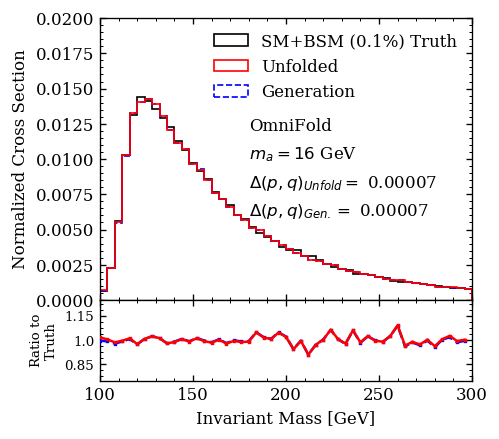

In [20]:
hist_style = {'histtype': 'step', 'density': True, 'lw': 1, 'zorder': 2}
omnifold_style = {'ls': '-', 'marker': 's', 'ms': 1., 'zorder': 3}

itn = 6

#'xlabel': r'Jet Mass $m$ [GeV]', 'symbol': r'$m$',
#'ylabel': r'Normalized Cross Section [GeV$^{-1}$]',

fig, [ax0, ax1] = modplot.axes(xlabel = 'Invariant Mass [GeV]', ylabel = 'Normalized Cross Section', xlim = (100, 300))
ax0.set_ylim([0, .02])
ax1.set_ylim([0.75, 1.25])

rnge = [100,300]

h1 = ax0.hist(X_detT[:200000,0], bins=50, color='black', label='SM+BSM (0.1%) Truth', range = rnge, **hist_style)[0]
h2 = ax0.hist(X_gen[:200000,0], bins=50, color='blue', linestyle = 'dashed', label='Generation', range = rnge, **hist_style)[0]
h3 = ax0.hist(X_gen[:200000,0], weights = ws[itn][:200000]*200000./np.sum(ws[itn]), bins=50, range = rnge, color='red', label='Unfolded', **hist_style)[0]
#h4 = ax0.hist(X_gen[:260000,0], weights = ws2[:]*260000./np.sum(ws2[:]), bins=50, range = rnge, color='orange', label='\"Perfect weights\"', **hist_style)[0]


ratio1 = h2/( h1 + 10**-50)
ratio2 = h3/( h1 + 10**-50)
#ratio3 = h4/( h1 + 10**-50)

xbins = []
for i in range(50):
    xbins.append(100+i*4)

ax1.plot(xbins, ratio1, color='blue', linestyle = 'dashed', label='``SM\"', **omnifold_style)
ax1.plot(xbins, ratio2, color='red', label='``SM\"', **omnifold_style)
#ax1.plot(xbins, ratio3, color='orange', label='``SM\"', **omnifold_style)

loc = 'upper right'
ncol = 1
order = [2, 0, 1] if ncol==2 else [0, 2, 1]
#order = [2, 0, 1] if ncol==2 else [0, 2, 1]
modplot.legend(ax=ax0, frameon=False, order=order, loc=loc, ncol=ncol)

ax0.text(180, .012, 'OmniFold')
ax0.text(180, .01, '$m_{a} = 16$ GeV')
ax0.text(180, .008, '$\Delta (p,q)_{Unfold} = $ %.5f' %(tri((100,300), 50, h1, h3)))
ax0.text(180, .006, '$\Delta (p,q)_{Gen.} = $ %.5f' %(tri((100,300), 50, h1, h2)))

#plt.show()
plt.savefig('125_inv_mass_reweight_omni_0perc_5GeV.pdf', bbox_inches = "tight")

/opt/anaconda3/envs/shared_env/lib/python3.6/site-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Saw kwargs ['ls', 'linestyle'] which are all aliases for 'linestyle'.  Kept value from 'linestyle'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.


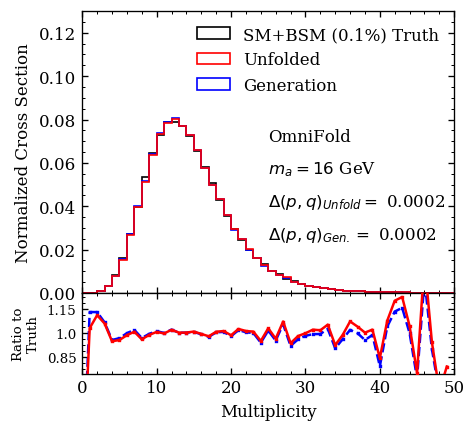

In [21]:
hist_style = {'histtype': 'step', 'density': True, 'lw': 1, 'zorder': 2}
omnifold_style = {'ls': '-', 'marker': 's', 'ms': 1., 'zorder': 3}

itn = 6

#'xlabel': r'Jet Mass $m$ [GeV]', 'symbol': r'$m$',
#'ylabel': r'Normalized Cross Section [GeV$^{-1}$]',

fig, [ax0, ax1] = modplot.axes(xlabel = 'Multiplicity', ylabel = 'Normalized Cross Section', xlim = (0, 50))
ax0.set_ylim([0, .13])
ax1.set_ylim([0.75, 1.25])

rnge = [0,50]

h1 = ax0.hist(X_detT[:200000,2], bins=50, color='black', label='SM+BSM (0.1%) Truth', range = rnge, **hist_style)[0]
h2 = ax0.hist(X_gen[:200000,2], bins=50, color='blue', label='Generation', range = rnge, **hist_style)[0]
h3 = ax0.hist(X_gen[:200000,2], weights = ws[itn][:200000]*200000./np.sum(ws[itn]), bins=50, range = rnge, color='red', label='Unfolded', **hist_style)[0]
#h4 = ax0.hist(X_gen[:260000,2], weights = ws2[:]*260000./np.sum(ws2[:]), bins=50, range = rnge, color='orange', label='\"Perfect weights\"', **hist_style)[0]

ratio1 = h2/( h1 + 10**-50)
ratio2 = h3/( h1 + 10**-50)
#ratio3 = h4/( h1 + 10**-50)

xbins = []
for i in range(50):
    xbins.append(i)

ax1.plot(xbins, ratio1, color='blue', linestyle = 'dashed', label='``SM\"', **omnifold_style)
ax1.plot(xbins, ratio2, color='red', label='``SM\"', **omnifold_style)
#ax1.plot(xbins, ratio3, color='orange', label='``SM\"', **omnifold_style)

loc = 'upper right'
ncol = 1
order = [2, 0, 1] if ncol==2 else [0, 2, 1]
#order = [2, 0, 1] if ncol==2 else [0, 2, 1]
modplot.legend(ax=ax0, frameon=False, order=order, loc=loc, ncol=ncol)

ax0.text(25, .07, 'OmniFold')
ax0.text(25, .055, '$m_{a} = 16$ GeV')
ax0.text(25, .04, '$\Delta (p,q)_{Unfold} = $ %.4f' %(tri((0,50), 50, h1, h3)))
ax0.text(25, .025, '$\Delta (p,q)_{Gen.} = $ %.4f' %(tri((0,50), 50, h1, h2)))

#plt.show()
plt.savefig('125_jet_mult_reweight_omni_0perc_5GeV.pdf', bbox_inches = "tight")

/opt/anaconda3/envs/shared_env/lib/python3.6/site-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Saw kwargs ['ls', 'linestyle'] which are all aliases for 'linestyle'.  Kept value from 'linestyle'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.


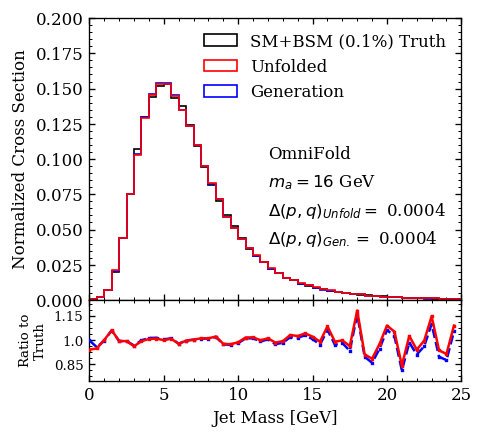

In [22]:
hist_style = {'histtype': 'step', 'density': True, 'lw': 1, 'zorder': 2}
omnifold_style = {'ls': '-', 'marker': 's', 'ms': 1., 'zorder': 3}

itn = 6

#'xlabel': r'Jet Mass $m$ [GeV]', 'symbol': r'$m$',
#'ylabel': r'Normalized Cross Section [GeV$^{-1}$]',

fig, [ax0, ax1] = modplot.axes(xlabel = 'Jet Mass [GeV]', ylabel = 'Normalized Cross Section', xlim = (0, 25))
ax0.set_ylim([0, .20])
ax1.set_ylim([0.75, 1.25])

rnge = [0,25]

h1 = ax0.hist(X_detT[:200000,1], bins=50, color='black', label='SM+BSM (0.1%) Truth', range = rnge, **hist_style)[0]
h2 = ax0.hist(X_gen[:200000,1], bins=50, color='blue', label='Generation', range = rnge, **hist_style)[0]
h3 = ax0.hist(X_gen[:200000,1], weights = ws[itn][:200000]*260000./np.sum(ws[itn]), bins=50, range = rnge, color='red', label='Unfolded', **hist_style)[0]
#h4 = ax0.hist(X_gen[:260000,1], weights = ws2[:]*260000./np.sum(ws2[:]), bins=50, range = rnge, color='orange', label='\"Perfect weights\"', **hist_style)[0]

ratio1 = h2/( h1 + 10**-50)
ratio2 = h3/( h1 + 10**-50)
#ratio3 = h4/( h1 + 10**-50)

xbins = []
for i in range(50):
    xbins.append(i*.5)

ax1.plot(xbins, ratio1, color='blue', linestyle = 'dashed', label='``SM\"', **omnifold_style)
ax1.plot(xbins, ratio2, color='red', label='``SM\"', **omnifold_style)
#ax1.plot(xbins, ratio3, color='orange', label='``SM\"', **omnifold_style)

loc = 'upper right'
ncol = 1
order = [2, 0, 1] if ncol==2 else [0, 2, 1]
modplot.legend(ax=ax0, frameon=False, order=order, loc=loc, ncol=ncol)

ax0.text(12, .1, 'OmniFold')
ax0.text(12, .08, '$m_{a} = 16$ GeV')
ax0.text(12, .06, '$\Delta (p,q)_{Unfold} = $ %.4f' %(tri((0,25), 50, h1, h3)))
ax0.text(12, .04, '$\Delta (p,q)_{Gen.} = $ %.4f' %(tri((0,25), 50, h1, h2)))

#plt.show()
plt.savefig('125_jet_mass_reweight_omni_0perc_5GeV.pdf', bbox_inches = "tight")

In [166]:
def tri(xlim, numbins, h1, h2):
    binsize = (float(xlim[1])-float(xlim[0]))/float(numbins)
    #print(binsize)
    integral = 0.
    for i in range(len(h1)):
        integral += (h1[i] - h2[i])*(h1[i] - h2[i])/(h1[i] + h2[i])
    return integral

0.024
0.007


/opt/anaconda3/envs/shared_env/lib/python3.6/site-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Saw kwargs ['ls', 'linestyle'] which are all aliases for 'linestyle'.  Kept value from 'linestyle'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.


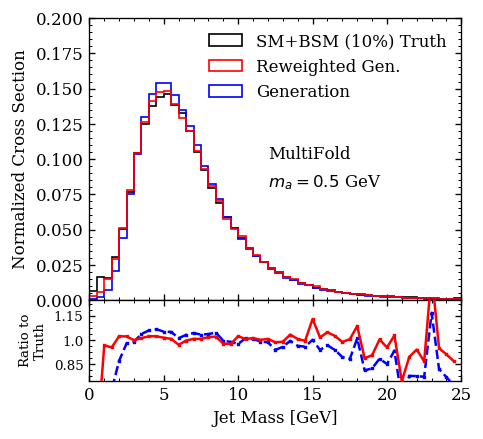

In [173]:
hist_style = {'histtype': 'step', 'density': True, 'lw': 1, 'zorder': 2}
omnifold_style = {'ls': '-', 'marker': 's', 'ms': 1., 'zorder': 3}

itn = 10

#'xlabel': r'Jet Mass $m$ [GeV]', 'symbol': r'$m$',
#'ylabel': r'Normalized Cross Section [GeV$^{-1}$]',

fig, [ax0, ax1] = modplot.axes(xlabel = 'Jet Mass [GeV]', ylabel = 'Normalized Cross Section', xlim = (0, 25))
ax0.set_ylim([0, .20])
ax1.set_ylim([0.75, 1.25])

rnge = [0,25]

h1 = ax0.hist(X_detT[:200000,1], bins=50, color='black', label='SM+BSM (10%) Truth', range = rnge, **hist_style)[0]
h2 = ax0.hist(X_gen[:200000,1], bins=50, color='blue', label='Generation', range = rnge, **hist_style)[0]
h3 = ax0.hist(X_gen[:200000,1], weights = ws[itn][:200000]*260000./np.sum(ws[itn]), bins=50, range = rnge, color='red', label='Reweighted Gen.', **hist_style)[0]
#h4 = ax0.hist(X_gen[:260000,1], weights = ws2[:]*260000./np.sum(ws2[:]), bins=50, range = rnge, color='orange', label='\"Perfect weights\"', **hist_style)[0]

print('%.3f'%(tri((0,25), 50, h1, h2)))
print('%.3f'%(tri((0,25), 50, h1, h3)))

ratio1 = h2/( h1 + 10**-50)
ratio2 = h3/( h1 + 10**-50)
#ratio3 = h4/( h1 + 10**-50)

xbins = []
for i in range(50):
    xbins.append(i*.5)

ax1.plot(xbins, ratio1, color='blue', linestyle = 'dashed', label='``SM\"', **omnifold_style)
ax1.plot(xbins, ratio2, color='red', label='``SM\"', **omnifold_style)
#ax1.plot(xbins, ratio3, color='orange', label='``SM\"', **omnifold_style)

loc = 'upper right'
ncol = 1
order = [2, 0, 1] if ncol==2 else [0, 2, 1]
modplot.legend(ax=ax0, frameon=False, order=order, loc=loc, ncol=ncol)

ax0.text(12, .1, 'MultiFold')
ax0.text(12, .08, '$m_{a} = 0.5$ GeV')

plt.show()
#plt.savefig('125_jet_mass_reweight_multi_10perc_0GeV.pdf', bbox_inches = "tight")